# Imports

In [1]:
from deepchecks.base import Dataset
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from deepchecks.checks.performance import RegressionSystematicError

# Generating data:

In [2]:
diabetes_df = load_diabetes(return_X_y=False, as_frame=True).frame
train_df, test_df = train_test_split(diabetes_df, test_size=0.33, random_state=42)
train_df['target'] = train_df['target'] + 150

train = Dataset(train_df, label='target', cat_features=['sex'])
test = Dataset(test_df, label='target', cat_features=['sex'])

clf = GradientBoostingRegressor(random_state=0)
_ = clf.fit(train.features_columns, train.label_col)

# Running RegressionSystematicError check:

In [3]:
check = RegressionSystematicError()

Regression Systematic Error

Check the regression systematic error.

Box plot of the model prediction error

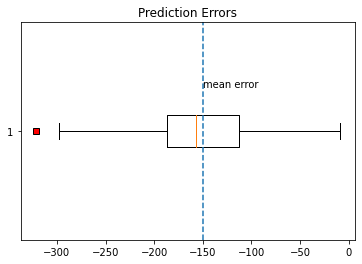

In [4]:
check.run(test, clf)